## Ваша задача:
1. Реализовать любой проект (классификация/регрессия) и на тренировать соответствующую модель. Выбор данных и модели на ваше усмотрение.
2. Использовать mlflow для отслеживания метрик и параметров.
3. Обернуть модель в FastAPI, чтобы принимала запросы и выдавала ответы.
4. Завернуть всё в Docker.
5. Всё оформить по файлам и загрузить в GitHub (Не забудьте сделать репозиторий публичным).

In [1]:
from sklearn.datasets import load_wine
import pandas as pd

data = load_wine()

In [11]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [36]:
df['target'].unique()

array([0, 1, 2])

In [12]:
X = df.drop(columns=['target'])  # Признаки
y = df['target']  # Целевая переменная

In [20]:
df.shape

(178, 14)

In [16]:
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_test.shape

(36, 13)

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(C=0.5, max_iter=100)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [50]:
from sklearn.metrics import classification_report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [51]:
import numpy as np
import matplotlib.pyplot as plt

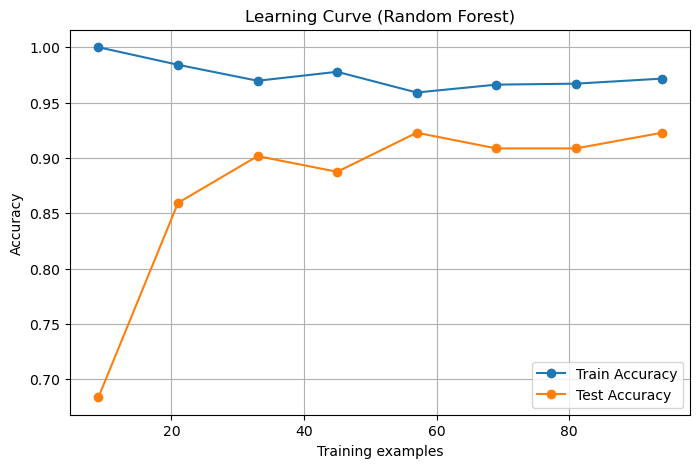

In [52]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 8),
    random_state=42
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label='Train Accuracy', marker='o')
plt.plot(train_sizes, test_mean, label='Test Accuracy', marker='o')
plt.title('Learning Curve (Random Forest)')
plt.xlabel('Training examples')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [54]:
test_scores 
#в строке 3 значения по 3 фолдам, каждая строка это какой-то процент данных в соответствии с train_sizes

array([[0.60416667, 0.80851064, 0.63829787],
       [0.83333333, 0.91489362, 0.82978723],
       [0.875     , 0.95744681, 0.87234043],
       [0.875     , 0.91489362, 0.87234043],
       [0.89583333, 0.93617021, 0.93617021],
       [0.89583333, 0.93617021, 0.89361702],
       [0.89583333, 0.93617021, 0.89361702],
       [0.89583333, 0.95744681, 0.91489362]])

In [62]:
!pip install mlflow

   ---------------------------------------- 0.0/28.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/28.3 MB 1.3 MB/s eta 0:00:23
   ---------------------------------------- 0.0/28.3 MB 653.6 kB/s eta 0:00:44
   ---------------------------------------- 0.0/28.3 MB 653.6 kB/s eta 0:00:44
   ---------------------------------------- 0.1/28.3 MB 238.1 kB/s eta 0:01:59
   ---------------------------------------- 0.1/28.3 MB 403.5 kB/s eta 0:01:10
   ---------------------------------------- 0.1/28.3 MB 479.3 kB/s eta 0:00:59
   ---------------------------------------- 0.1/28.3 MB 479.3 kB/s eta 0:00:59
   ---------------------------------------- 0.1/28.3 MB 479.3 kB/s eta 0:00:59
   ---------------------------------------- 0.2/28.3 MB 377.4 kB/s eta 0:01:15
   ---------------------------------------- 0.2/28.3 MB 491.0 kB/s eta 0:00:58
   ---------------------------------------- 0.2/28.3 MB 519.9 kB/s eta 0:00:54
   ---------------------------------------- 0.2/28.3 MB 519.9 k

In [64]:
!mlflow --version

mlflow, version 2.20.1


In [70]:
pd.__version__

'2.1.4'

In [77]:
import mlflow

In [80]:
mlflow.set_tracking_uri("http://localhost:5000")

In [82]:
with mlflow.start_run():
    mlflow.log_param("С Logreg", 0.1) # Записываем параметр
    mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred)) # Записываем метрику
    print("Эксперимент сохранён в MLflow")

Эксперимент сохранён в MLflow
🏃 View run aged-grub-97 at: http://localhost:5000/#/experiments/0/runs/c1f78619273e463b8ccd7c4a2475232f
🧪 View experiment at: http://localhost:5000/#/experiments/0
